In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io
import torch
from glob import glob

In [44]:
folders_composite=glob("Composite Images/*/")
folders_composite

['Composite Images\\20190508-C2GNT1-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-05-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-05-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-GALNT

In [45]:
labels=pd.read_csv('labels.csv',index_col=0)
labels

,label
0,20190508-C2GNT1-EGFP-Noc-01
1,20190508-C2GNT1-EGFP-Noc-02
2,20190508-C2GNT1-EGFP-Noc-03
3,20190508-C2GNT1-EGFP-Noc-04
4,20190508-C2GNT1-EGFP-Noc-05
5,20190508-GALNT4-EGFP-Noc-01
6,20190508-GALNT4-EGFP-Noc-02
7,20190508-GALNT4-EGFP-Noc-03
8,20190508-GALNT4-EGFP-Noc-04
9,20190508-GALNT4-EGFP-Noc-05


In [46]:
test_label=list(labels.iloc[28:38]['label'])
test_label

['20190823-EGFP-Golph3-Noc-01',
 '20190823-EGFP-Golph3-Noc-02',
 '20190823-EGFP-Golph3-Noc-03',
 '20190823-EGFP-Golph3-Noc-04',
 '20190823-EGFP-Golph3-Noc-05',
 '20190823-EGFP-Golph3-Noc-06',
 '20190823-EGFP-Golph3-Noc-07',
 '20190823-EGFP-Golph3-Noc-08',
 '20190823-EGFP-Golph3-Noc-09',
 '20190823-EGFP-Golph3-Noc-10']

In [47]:
test_label_ind=list(labels.iloc[28:38].index)
test_label_ind

[28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

In [48]:
val_label=list(labels.iloc[20:28]['label'])
val_label

['20190508-VIP36-EGFP-Noc-01',
 '20190508-VIP36-EGFP-Noc-02',
 '20190508-VIP36-EGFP-Noc-03',
 '20190508-VIP36-EGFP-Noc-04',
 '20190508-VIP36-EGFP-Noc-05',
 '20190508-VIP36-EGFP-Noc-06',
 '20190508-VIP36-EGFP-Noc-07',
 '20190508-VIP36-EGFP-Noc-08']

In [49]:
val_label_ind=list(labels.iloc[20:28].index)
val_label_ind

[20, 21, 22, 23, 24, 25, 26, 27]

In [50]:
train_label_ind=labels[~labels['label'].isin(test_label)]
train_label_ind=list(train_label_ind[~train_label_ind['label'].isin(val_label)].index)
train_label_ind

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 38, 39]

In [51]:
class Model_BaseCNN(torch.nn.Module):
    def __init__(self):
        super(Model_BaseCNN, self).__init__()

        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(3, 6, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            torch.nn.Conv2d(6, 12, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(12, 24, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(24, 48, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = torch.nn.Sequential(
            torch.nn.Linear(192, 60),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(60, 16),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(16,2)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [52]:
def Transform(img):
    test=np.swapaxes(img,0,2)
    test=np.swapaxes(test,1,2)
    return np.array(test,dtype='f')

In [53]:
def GetObject(img,top,bottom,left,right):
    roi=img[top:bottom+1,left:right+1]
    return cv2.resize(roi, dsize=(17, 17), interpolation=cv2.INTER_CUBIC)

In [54]:
pos_sample=[]
pos_target=[]

for i in range(0,40):
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    golgy_co_file_path=folders_composite[i]+"\\{}_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    golgy_co_df=pd.read_csv(golgy_co_file_path,index_col=0)

    for index,row in golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        pos_sample.append(obj_tensor)
        pos_target.append(1)


In [55]:
pos_sample[0].shape

(3, 17, 17)

In [56]:
torch.tensor(pos_sample).shape

torch.Size([3881, 3, 17, 17])

In [57]:
neg_sample=[]
neg_target=[]

for i in range(0,40):
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    non_golgy_co_file_path=folders_composite[i]+"\\{}_non_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    non_golgy_co_df=pd.read_csv(non_golgy_co_file_path,index_col=0)

    for index,row in non_golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        neg_sample.append(obj_tensor)
        neg_target.append(0)



In [58]:
torch.tensor(neg_sample).shape

torch.Size([2612, 3, 17, 17])

In [59]:
x_train=[]
y_train=[]

for i in train_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    golgy_co_file_path=folders_composite[i]+"\\{}_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    golgy_co_df=pd.read_csv(golgy_co_file_path,index_col=0)

    for index,row in golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_train.append(obj_tensor)
        y_train.append(1)


In [60]:
torch.tensor(x_train).shape

torch.Size([3434, 3, 17, 17])

In [61]:

for i in train_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    non_golgy_co_file_path=folders_composite[i]+"\\{}_non_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    non_golgy_co_df=pd.read_csv(non_golgy_co_file_path,index_col=0)

    for index,row in non_golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_train.append(obj_tensor)
        y_train.append(0)

In [62]:
torch.tensor(x_train).shape

torch.Size([5291, 3, 17, 17])

In [63]:
np.unique(np.array(y_train), return_counts=True)

(array([0, 1]), array([1857, 3434], dtype=int64))

In [64]:
x_val=[]
y_val=[]

for i in val_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    golgy_co_file_path=folders_composite[i]+"\\{}_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    golgy_co_df=pd.read_csv(golgy_co_file_path,index_col=0)

    for index,row in golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_val.append(obj_tensor)
        y_val.append(1)
    
    non_golgy_co_file_path=folders_composite[i]+"\\{}_non_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    non_golgy_co_df=pd.read_csv(non_golgy_co_file_path,index_col=0)

    for index,row in non_golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_val.append(obj_tensor)
        y_val.append(0)

In [65]:
torch.tensor(x_val).shape

torch.Size([599, 3, 17, 17])

In [66]:
np.unique(np.array(y_val), return_counts=True)

(array([0, 1]), array([351, 248], dtype=int64))

In [67]:
x_test=[]
y_test=[]

for i in test_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    golgy_co_file_path=folders_composite[i]+"\\{}_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    golgy_co_df=pd.read_csv(golgy_co_file_path,index_col=0)

    for index,row in golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_test.append(obj_tensor)
        y_test.append(1)
    
    non_golgy_co_file_path=folders_composite[i]+"\\{}_non_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    non_golgy_co_df=pd.read_csv(non_golgy_co_file_path,index_col=0)

    for index,row in non_golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_test.append(obj_tensor)
        y_test.append(0)

In [68]:
torch.tensor(x_test).shape

torch.Size([603, 3, 17, 17])

In [69]:
np.unique(np.array(y_test), return_counts=True)

(array([0, 1]), array([404, 199], dtype=int64))

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
def PrepareTrainData(x,y):
    traindata=[]
    for i in range(0,len(x)):
        traindata.append([x[i],y[i]])
    return traindata

In [72]:
import torch.utils.data as Data

In [73]:
train_data=PrepareTrainData(x_train,y_train)
val_data=PrepareTrainData(x_val,y_val)

In [74]:
train_loader = Data.DataLoader(
    dataset=train_data,      # torch TensorDataset format
    batch_size=40,      # ����������
    shuffle=True,               # �Ƿ������������
    num_workers=2,              # ���ڼ������ݵ��ӽ���
)

val_loader = Data.DataLoader(
    dataset=val_data,      # torch TensorDataset format
    batch_size=40,      # ����������
    shuffle=True,               # �Ƿ������������
    num_workers=2,              # ���ڼ������ݵ��ӽ���
)

In [75]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [76]:
def Predict(Model,X):
    test_pred = Model(X)
    res =test_pred.data
    y_pred=torch.max(res,1)[1]
    return y_pred

In [77]:
def PrintReport(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred, target_names=['Non-Golgy','Golgy'] ))
  sns.heatmap(cm, annot=True,fmt='g',cmap ='Reds',xticklabels=['Non-Golgy','Golgy'],yticklabels=['Non-Golgy','Golgy'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

In [78]:
np.unique(np.array(y_train), return_counts=True)

(array([0, 1]), array([1857, 3434], dtype=int64))

In [79]:
3434-1857

1577

In [80]:
def RotateImage(img):
    test=cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
    test=np.swapaxes(img,0,2)
    test=np.swapaxes(test,1,2)
    return np.array(test,dtype='f')

In [81]:
count=0

for i in train_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    non_golgy_co_file_path=folders_composite[i]+"\\{}_non_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    non_golgy_co_df=pd.read_csv(non_golgy_co_file_path,index_col=0)

    for index,row in non_golgy_co_df.iterrows():
        if count==1577:
            break
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=RotateImage(obj)
        x_train.append(obj_tensor)
        y_train.append(0)

        count+=1
    
    if count==1577:
        break

In [82]:
np.unique(np.array(y_train), return_counts=True)

(array([0, 1]), array([3434, 3434], dtype=int64))

In [83]:
def Train_v2(epoch,learning_rate,version):

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    loss_func = torch.nn.CrossEntropyLoss()
    epochs=epoch

    epoch_list=[]
    train_loss_list=[]
    val_loss_list=[]
    train_acc_0_list=[]
    val_acc_0_list=[]
    train_acc_1_list=[]
    val_acc_1_list=[]

    best_loss=0

    for e in range(epochs):

        train_loss = 0.0

       # train_total_0 = 0
        #val_total_0 = 0
        
        #train_correct_0 = 0
        #val_correct_0 = 0

        train_total_pred_1 = 0
        train_total_true_1 = 0
        val_total_pred_1 = 0
        val_total_true_1 = 0
        
        train_correct_1 = 0
        val_correct_1 = 0

        for data, labels in train_loader:
            if torch.cuda.is_available():
                data, labels = data.cuda(), labels.cuda()
            
            optimizer.zero_grad()
            target = model(data)
            loss = loss_func(target,labels.long())
            loss.backward()
            optimizer.step()
            train_loss = loss.item() * data.size(0)

            scores, predictions = torch.max(target.data, 1)

            #train_total_0 += int(sum(labels == 0))
            #train_correct_0 += int(sum(p==l and l==0 for p,l in zip(predictions,labels)))
            #train_prec_0 = round(train_correct_0 / train_total_0, 3)

            train_total_pred_1 += int(sum(predictions == 1))
            train_total_true_1 += int(sum(labels==1))
            train_correct_1 += int(sum(p==l and l==1 for p,l in zip(predictions,labels)))
        
        train_prec_1 = round(train_correct_1 / train_total_pred_1, 3)
        train_recall_1 = round(train_correct_1/train_total_true_1, 3)
        train_F1_1 = 2*train_prec_1*train_recall_1/(train_prec_1+train_recall_1)

        
        valid_loss = 0.0
        ##model.eval()     # Optional when not using Model Specific layer
        for data, labels in val_loader:
            if torch.cuda.is_available():
                data, labels = data.cuda(), labels.cuda()
            
            target = model(data)
            loss = loss_func(target,labels.long())
            valid_loss = loss.item() * data.size(0) 

            scores, predictions = torch.max(target.data, 1)

            ##val_total_0 += int(sum(labels == 0))
            ##val_correct_0 += int(sum(p==l and l==0 for p,l in zip(predictions,labels)))
            ##val_acc_0 = round(val_correct_0 / val_total_0, 3)

            val_total_pred_1 += int(sum(predictions == 1))
            val_total_true_1 += int(sum(labels == 1))
            val_correct_1 += int(sum(p==l and l==1 for p,l in zip(predictions,labels)))
        
        val_prec_1 = round(val_correct_1 / val_total_pred_1, 3)
        val_recall_1 = round(val_correct_1/val_total_true_1, 3)
        val_F1_1 = 2*val_prec_1*val_recall_1/(val_prec_1+val_recall_1)
        
        train_loss=train_loss / len(train_loader)
        valid_loss=valid_loss / len(val_loader)
        print('Epoch {} \t\t Training Loss: {} \t\t Validation Loss: {} \t\t Training F1 Score for Positive Sample: {} \t\t Validation F1 Score for Positive Sample: {}'.format(e+1,train_loss,valid_loss,train_F1_1,val_F1_1))
        epoch_list.append(e+1)
        train_loss_list.append(train_loss)
        val_loss_list.append(valid_loss)
        train_acc_1_list.append(train_F1_1)
        val_acc_1_list.append(val_F1_1)


        #PATH='model_{}_epoch_{}.pkl'.format(version,e+1)
        #torch.save(model, PATH)   
    return model,pd.DataFrame({'Epoch':epoch_list,'Training Loss':train_loss_list,'Validation Loss':val_loss_list,'Training F1 Score':train_acc_1_list,'Validation F1 Score':val_acc_1_list})

In [84]:
model=Model_BaseCNN()
print(model)
model,loss_df=Train_v2(20,0.01,1)

Model_BaseCNN(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(12, 24, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(24, 48, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=192, out_features=60, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=60, out_features=16, bias=True)

In [85]:
def PlotLoss(data,lr):
    value_col=['Training Loss','Validation Loss']

    num1=1
    num2=0.37
    num3=3
    num4=0

    plt.figure(figsize=(10,7))
    for h in value_col:
        ##plt.plot(datelist, data[h],color='r', lw=1, marker='s', ms=4, label=h,linewidth=2.5)
        plt.plot(data['Epoch'], data[h], lw=1, marker='s', ms=4, label=h)
        plt.xlabel('Epoch',fontsize=15)  
        plt.ylabel('Accuracy',fontsize=15)   
    plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
    plt.title("Loss when Learning Rate = {}".format(lr))
    plt.show()

In [86]:
def PlotF1(data,lr):
    value_col=['Training F1 Score','Validation F1 Score']

    num1=1
    num2=0.37
    num3=3
    num4=0

    plt.figure(figsize=(10,7))
    for h in value_col:
        ##plt.plot(datelist, data[h],color='r', lw=1, marker='s', ms=4, label=h,linewidth=2.5)
        plt.plot(data['Epoch'], data[h], lw=1, marker='s', ms=4, label=h)
        plt.xlabel('Epoch',fontsize=15)  
        plt.ylabel('Accuracy',fontsize=15)   
    plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
    plt.title("F1 score when Learning Rate = {}".format(lr))
    plt.show()

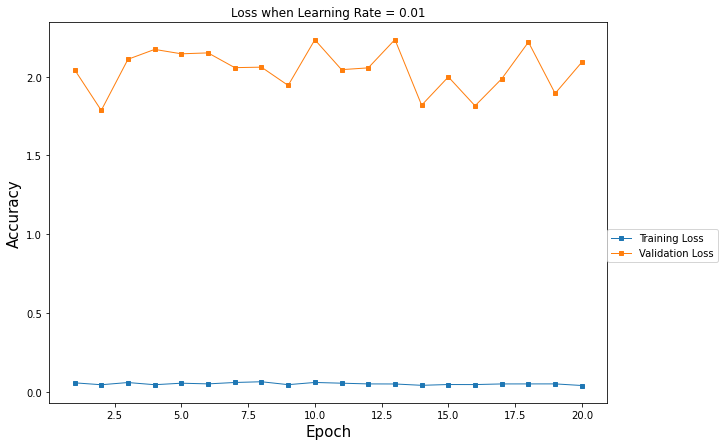

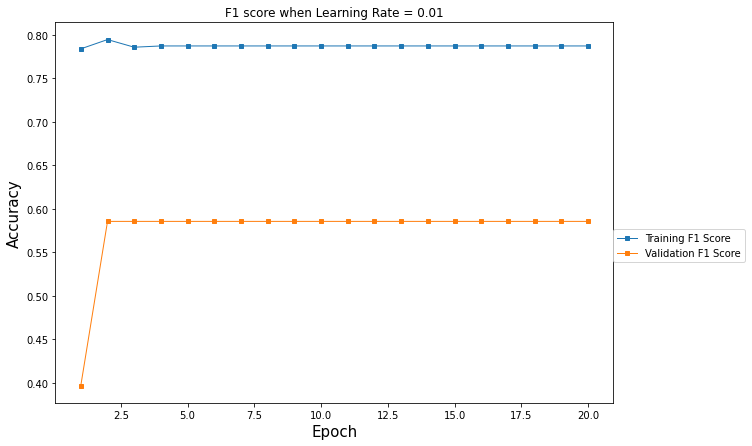

In [87]:
PlotLoss(loss_df,'0.01')
PlotF1(loss_df,'0.01')

C:\Users\Warden\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Warden\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Warden\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

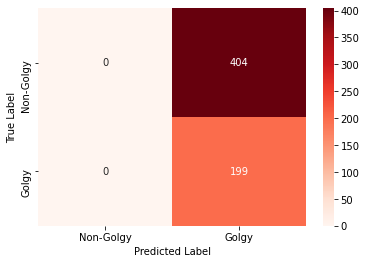

In [88]:
y_pred=Predict(model,torch.tensor(x_test))
PrintReport(y_test,y_pred)

In [89]:
model=Model_BaseCNN()
print(model)
model,loss_df=Train_v2(50,0.001,1)

Model_BaseCNN(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(12, 24, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(24, 48, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=192, out_features=60, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=60, out_features=16, bias=True)

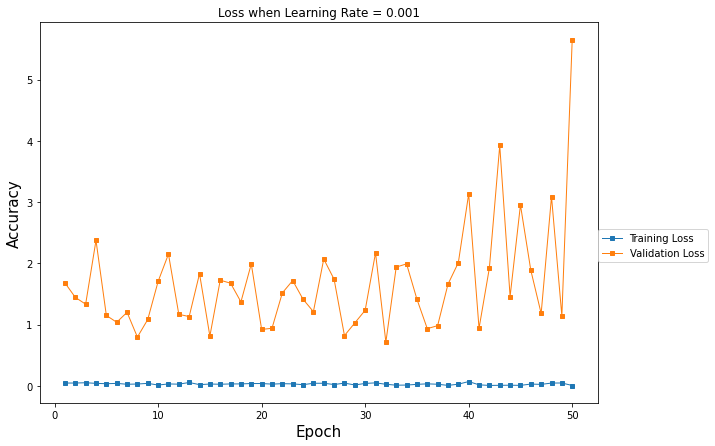

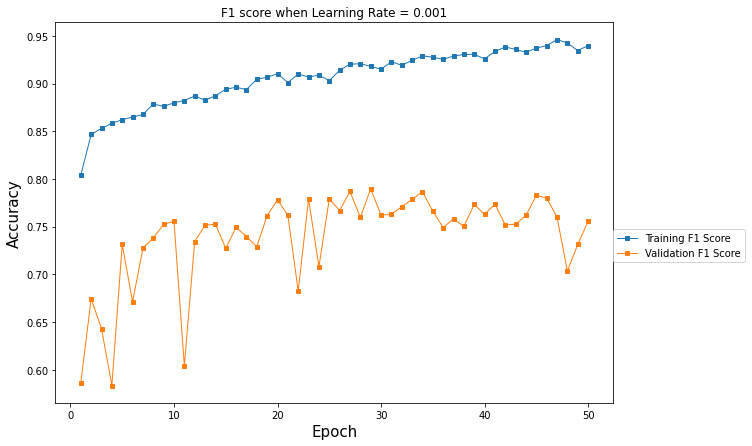

In [94]:
PlotLoss(loss_df,'0.001')
PlotF1(loss_df,'0.001')

              precision    recall  f1-score   support

   Non-Golgy       0.80      0.78      0.79       404
       Golgy       0.58      0.61      0.60       199

    accuracy                           0.73       603
   macro avg       0.69      0.70      0.70       603
weighted avg       0.73      0.73      0.73       603



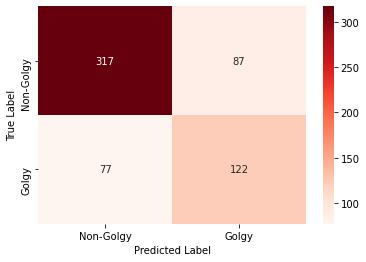

In [92]:
y_pred=Predict(model,torch.tensor(x_test))
PrintReport(y_test,y_pred)

In [61]:
torch.save(model,'Model_6_1_4.pkl')

In [95]:
model=Model_BaseCNN()
print(model)
model,loss_df=Train_v2(500,0.0001,1)

dation Loss: 19.635570812225343 		 Training F1 Score for Positive Sample: 0.9884876074860901 		 Validation F1 Score for Positive Sample: 0.7422818791946308
Epoch 407 		 Training Loss: 0.0009132072791681253 		 Validation Loss: 7.952890491485595 		 Training F1 Score for Positive Sample: 0.9944977375565611 		 Validation F1 Score for Positive Sample: 0.7439516129032258
Epoch 408 		 Training Loss: 1.1734996508295767e-05 		 Validation Loss: 8.222734069824218 		 Training F1 Score for Positive Sample: 0.9939959758551308 		 Validation F1 Score for Positive Sample: 0.7374237288135592
Epoch 409 		 Training Loss: 2.8953498231135028e-05 		 Validation Loss: 20.18599691390991 		 Training F1 Score for Positive Sample: 0.9864794728839331 		 Validation F1 Score for Positive Sample: 0.7534976805831677
Epoch 410 		 Training Loss: 4.5010929881714114e-05 		 Validation Loss: 7.266874361038208 		 Training F1 Score for Positive Sample: 0.9854875697615423 		 Validation F1 Score for Positive Sample: 0.7378048780

              precision    recall  f1-score   support

   Non-Golgy       0.76      0.87      0.81       404
       Golgy       0.62      0.44      0.51       199

    accuracy                           0.72       603
   macro avg       0.69      0.65      0.66       603
weighted avg       0.71      0.72      0.71       603



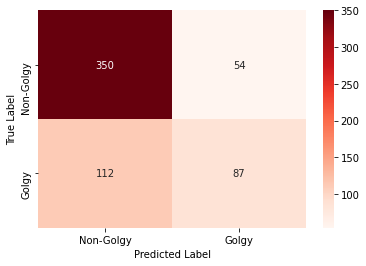

In [96]:
y_pred=Predict(model,torch.tensor(x_test))
PrintReport(y_test,y_pred)

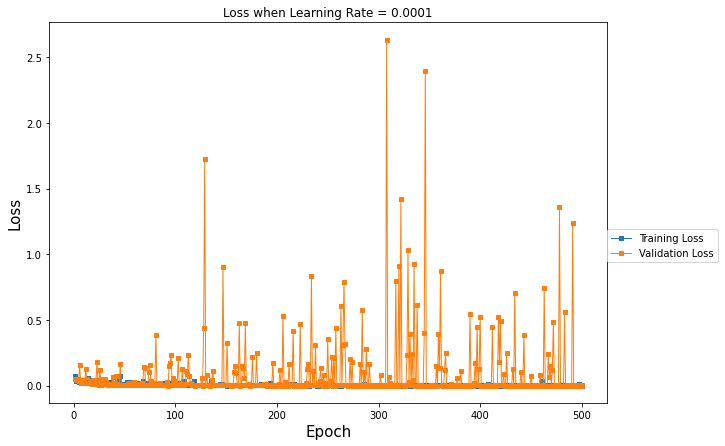

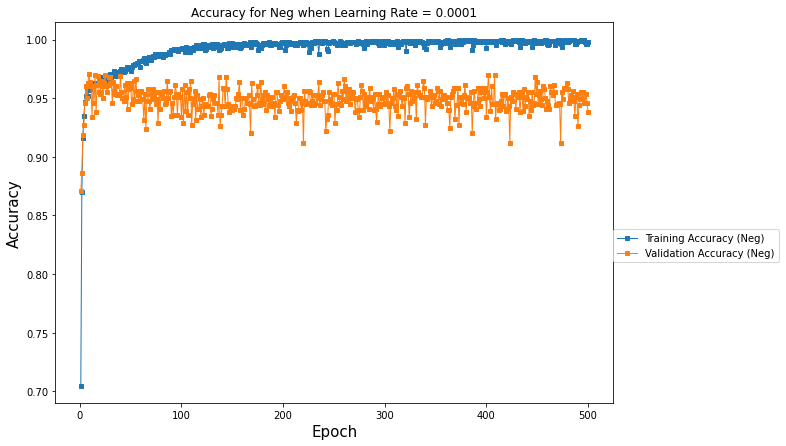

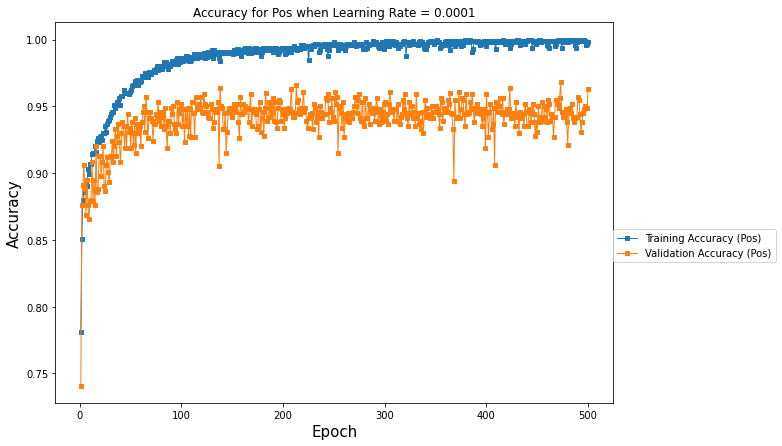

In [64]:
PlotLoss(loss_df,'0.0001')
PlotF1(loss_df,'0.0001')

In [65]:
torch.save(model,'Model_6_1_5.pkl')

In [66]:
def Train_v3(epoch,learning_rate,version):

    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    loss_func = torch.nn.CrossEntropyLoss()
    epochs=epoch

    epoch_list=[]
    train_loss_list=[]
    val_loss_list=[]
    train_acc_0_list=[]
    val_acc_0_list=[]
    train_acc_1_list=[]
    val_acc_1_list=[]

    best_loss=0

    for e in range(epochs):

        train_loss = 0.0

        train_total_0 = 0
        val_total_0 = 0
        
        train_correct_0 = 0
        val_correct_0 = 0

        train_total_1 = 0
        val_total_1 = 0
        
        train_correct_1 = 0
        val_correct_1 = 0

        for data, labels in train_loader:
            if torch.cuda.is_available():
                data, labels = data.cuda(), labels.cuda()
            
            optimizer.zero_grad()
            target = model(data)
            loss = loss_func(target,labels.long())
            loss.backward()
            optimizer.step()
            train_loss = loss.item() * data.size(0)

            scores, predictions = torch.max(target.data, 1)

            train_total_0 += int(sum(labels == 0))
            train_correct_0 += int(sum(p==l and l==0 for p,l in zip(predictions,labels)))
            train_acc_0 = round(train_correct_0 / train_total_0, 3)

            train_total_1 += int(sum(labels == 1))
            train_correct_1 += int(sum(p==l and l==1 for p,l in zip(predictions,labels)))
            train_acc_1 = round(train_correct_1 / train_total_1, 3)
        
        valid_loss = 0.0
        ##model.eval()     # Optional when not using Model Specific layer
        for data, labels in val_loader:
            if torch.cuda.is_available():
                data, labels = data.cuda(), labels.cuda()
            
            target = model(data)
            loss = loss_func(target,labels.long())
            valid_loss = loss.item() * data.size(0) 

            scores, predictions = torch.max(target.data, 1)

            val_total_0 += int(sum(labels == 0))
            val_correct_0 += int(sum(p==l and l==0 for p,l in zip(predictions,labels)))
            val_acc_0 = round(val_correct_0 / val_total_0, 3)

            val_total_1 += int(sum(labels == 1))
            val_correct_1 += int(sum(p==l and l==1 for p,l in zip(predictions,labels)))
            val_acc_1 = round(val_correct_1 / val_total_1, 3)
        
        train_loss=train_loss / len(train_loader)
        valid_loss=valid_loss / len(val_loader)
        print('Epoch {} \t\t Training Loss: {} \t\t Validation Loss: {} \t\t Training Accuracy for Negative Sample: {} \t\t Validation Accuracy for Negative Sample: {} \t\t Training Accuracy for Positive Sample: {} \t\t Validation Accuracy for Positive Sample: {}'.format(e+1,train_loss,valid_loss,train_acc_0,val_acc_0,train_acc_1,val_acc_1))
        epoch_list.append(e+1)
        train_loss_list.append(train_loss)
        val_loss_list.append(valid_loss)
        train_acc_0_list.append(train_acc_0)
        val_acc_0_list.append(val_acc_0)
        train_acc_1_list.append(train_acc_1)
        val_acc_1_list.append(val_acc_1)


        #PATH='model_{}_epoch_{}.pkl'.format(version,e+1)
        #torch.save(model, PATH)   
    return model,pd.DataFrame({'Epoch':epoch_list,'Training Loss':train_loss_list,'Validation Loss':val_loss_list,'Training Accuracy (Neg)':train_acc_0_list,'Validation Accuracy (Neg)':val_acc_0_list,'Training Accuracy (Pos)':train_acc_1_list,'Validation Accuracy (Pos)':val_acc_1_list})

In [67]:
model=Model_BaseCNN()
print(model)
model,loss_df=Train_v3(20,0.01,1)

Model_BaseCNN(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(12, 24, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(24, 48, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=48, out_features=32, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=16, bias=True)


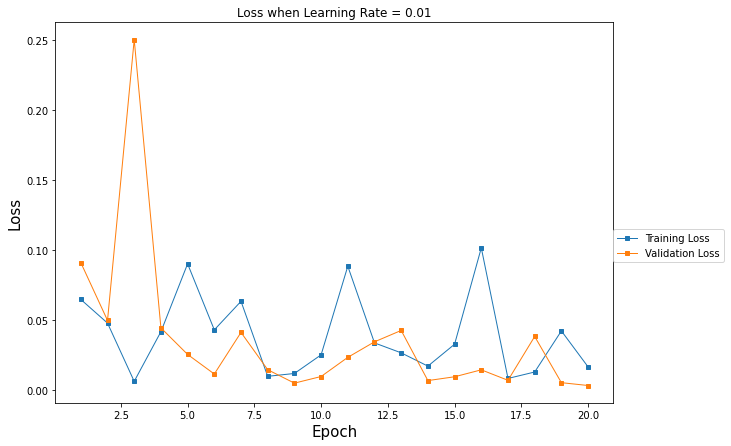

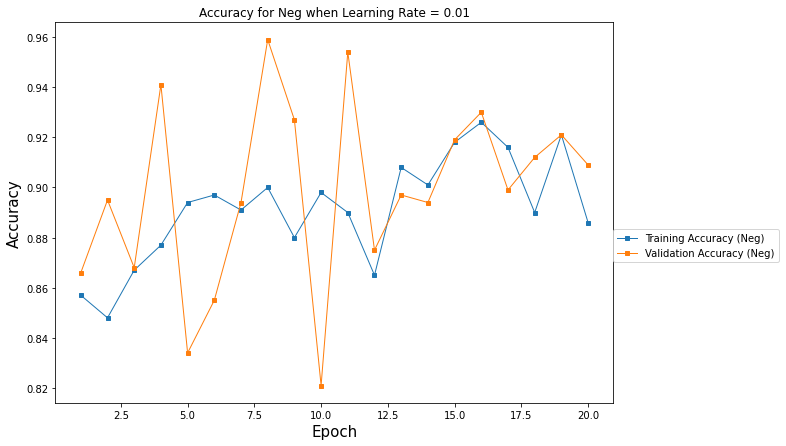

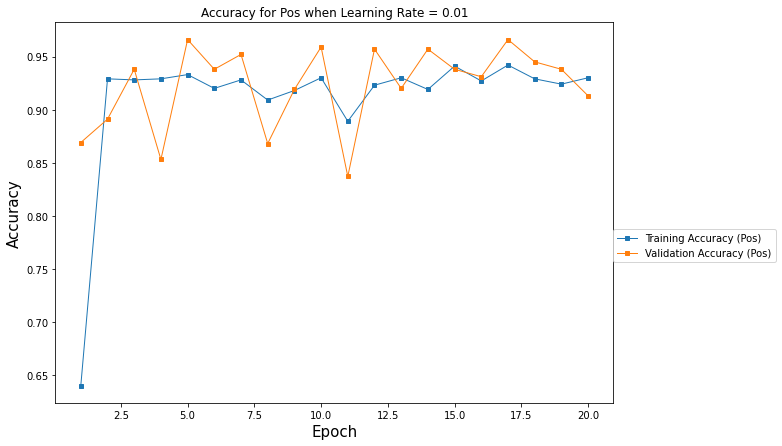

In [68]:
PlotLoss(loss_df,'0.01')
PlotACC_v2(loss_df,'0.01','Neg')
PlotACC_v2(loss_df,'0.01','Pos')

              precision    recall  f1-score   support

   Non-Golgy       0.99      0.95      0.97      6780
       Golgy       0.26      0.66      0.37       195

    accuracy                           0.94      6975
   macro avg       0.62      0.80      0.67      6975
weighted avg       0.97      0.94      0.95      6975



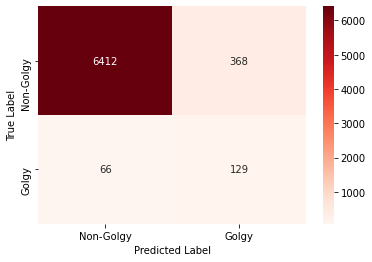

In [69]:
y_pred=Predict(model,torch.tensor(x_test))
PrintReport(y_test,y_pred)

In [70]:
torch.save(model,'Model_6_1_6.pkl')

In [71]:
model=Model_BaseCNN()
print(model)
model,loss_df=Train_v3(100,0.001,1)

n Accuracy for Positive Sample: 0.897
Epoch 31 		 Training Loss: 0.009380195655074775 		 Validation Loss: 0.0027707643233812773 		 Training Accuracy for Negative Sample: 0.984 		 Validation Accuracy for Negative Sample: 0.959 		 Training Accuracy for Positive Sample: 0.978 		 Validation Accuracy for Positive Sample: 0.946
Epoch 32 		 Training Loss: 0.0021865626468377955 		 Validation Loss: 0.005913408329853645 		 Training Accuracy for Negative Sample: 0.981 		 Validation Accuracy for Negative Sample: 0.953 		 Training Accuracy for Positive Sample: 0.972 		 Validation Accuracy for Positive Sample: 0.948
Epoch 33 		 Training Loss: 0.0003626624524008994 		 Validation Loss: 2.309561107092752e-05 		 Training Accuracy for Negative Sample: 0.987 		 Validation Accuracy for Negative Sample: 0.96 		 Training Accuracy for Positive Sample: 0.981 		 Validation Accuracy for Positive Sample: 0.942
Epoch 34 		 Training Loss: 0.0015852547743741203 		 Validation Loss: 2.4985354125069884e-05 		 Training 

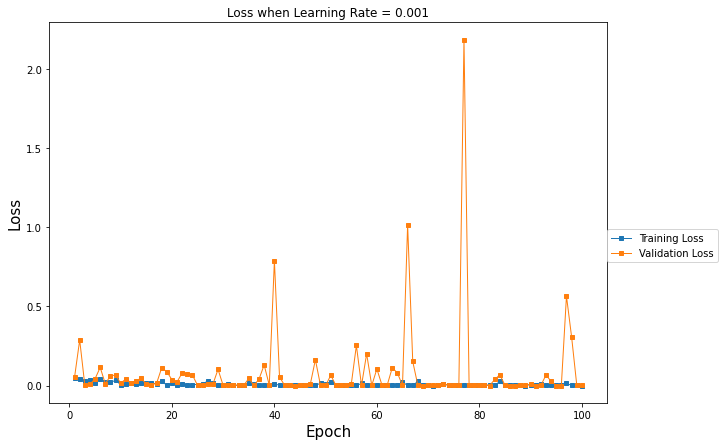

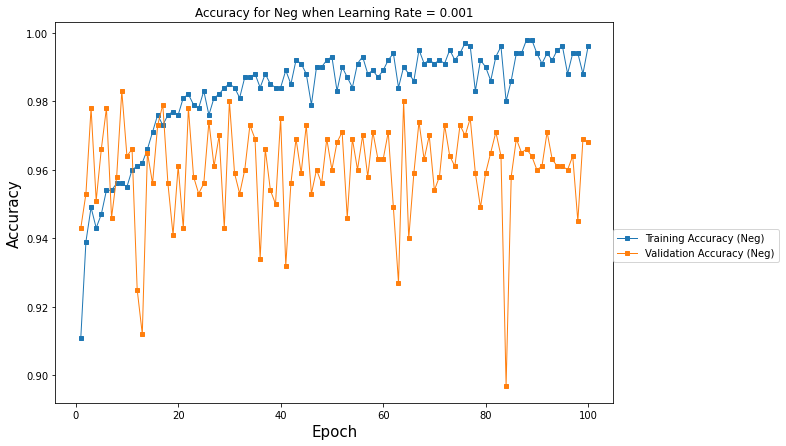

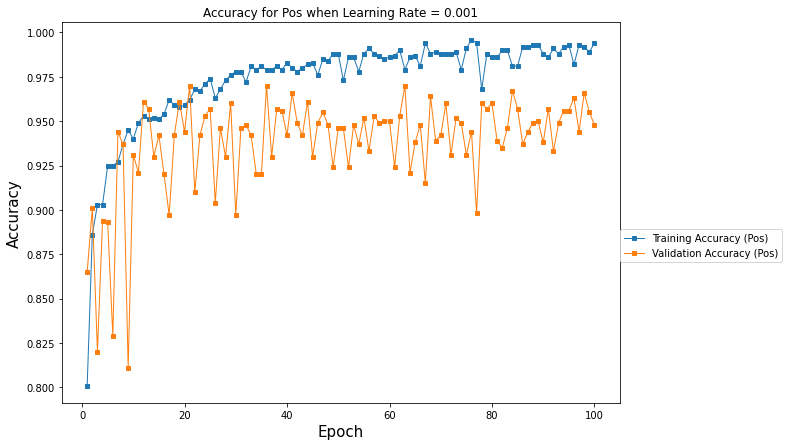

In [72]:
PlotLoss(loss_df,'0.001')
PlotACC_v2(loss_df,'0.001','Neg')
PlotACC_v2(loss_df,'0.001','Pos')

              precision    recall  f1-score   support

   Non-Golgy       0.99      0.98      0.98      6780
       Golgy       0.44      0.68      0.54       195

    accuracy                           0.97      6975
   macro avg       0.72      0.83      0.76      6975
weighted avg       0.98      0.97      0.97      6975



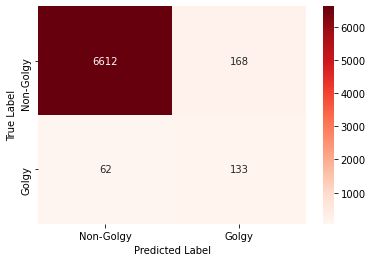

In [73]:
y_pred=Predict(model,torch.tensor(x_test))
PrintReport(y_test,y_pred)

In [74]:
torch.save(model,'Model_6_1_7.pkl')

In [75]:
model=Model_BaseCNN()
print(model)
model,loss_df=Train_v3(500,0.0001,1)

	 Validation Loss: 9.709157613822474e-06 		 Training Accuracy for Negative Sample: 0.999 		 Validation Accuracy for Negative Sample: 0.964 		 Training Accuracy for Positive Sample: 0.999 		 Validation Accuracy for Positive Sample: 0.928
Epoch 432 		 Training Loss: 0.005690614966785207 		 Validation Loss: 1.2226590885033007e-08 		 Training Accuracy for Negative Sample: 0.991 		 Validation Accuracy for Negative Sample: 0.944 		 Training Accuracy for Positive Sample: 0.99 		 Validation Accuracy for Positive Sample: 0.95
Epoch 433 		 Training Loss: 0.002843385233598597 		 Validation Loss: 1.3815849972441076e-06 		 Training Accuracy for Negative Sample: 0.997 		 Validation Accuracy for Negative Sample: 0.964 		 Training Accuracy for Positive Sample: 0.996 		 Validation Accuracy for Positive Sample: 0.92
Epoch 434 		 Training Loss: 7.400183605176269e-06 		 Validation Loss: 5.5355104940155376e-05 		 Training Accuracy for Negative Sample: 0.999 		 Validation Accuracy for Negative Sample: 0.95 

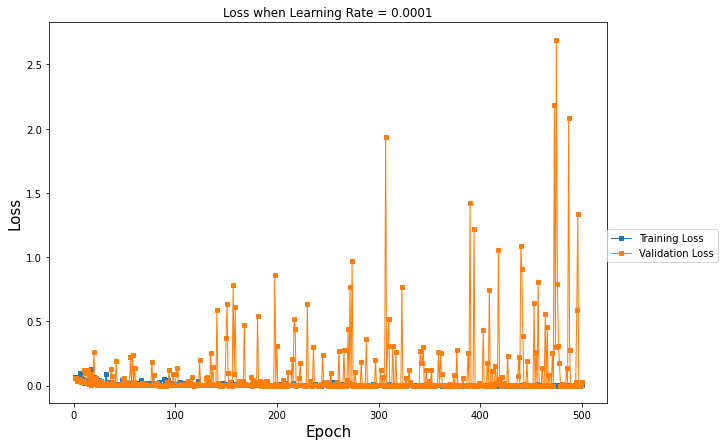

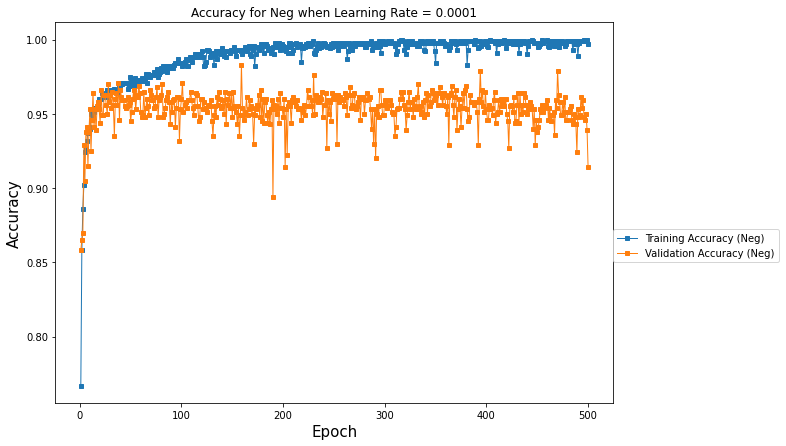

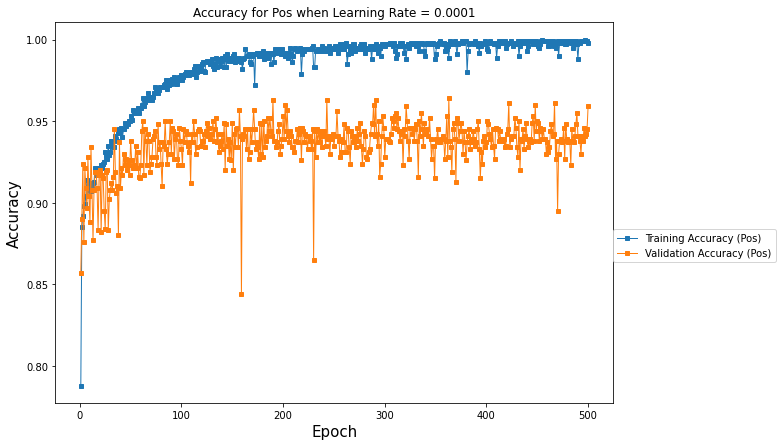

In [76]:
PlotLoss(loss_df,'0.0001')
PlotACC_v2(loss_df,'0.0001','Neg')
PlotACC_v2(loss_df,'0.0001','Pos')

              precision    recall  f1-score   support

   Non-Golgy       0.99      0.94      0.97      6780
       Golgy       0.27      0.76      0.40       195

    accuracy                           0.94      6975
   macro avg       0.63      0.85      0.68      6975
weighted avg       0.97      0.94      0.95      6975



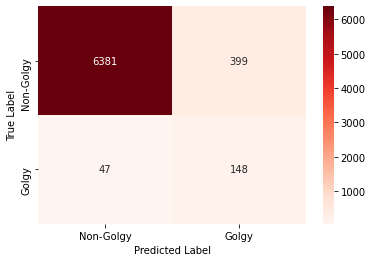

In [77]:
y_pred=Predict(model,torch.tensor(x_test))
PrintReport(y_test,y_pred)

In [78]:
torch.save(model,'Model_6_1_8.pkl')

In [79]:
model=Model_BaseCNN()
print(model)
model,loss_df=Train_v2(50,0.001,1)

Model_BaseCNN(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(12, 24, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(24, 48, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=48, out_features=32, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=16, bias=True)


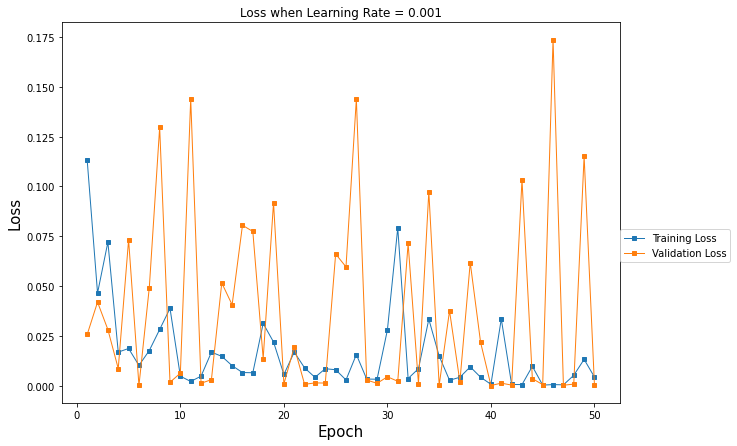

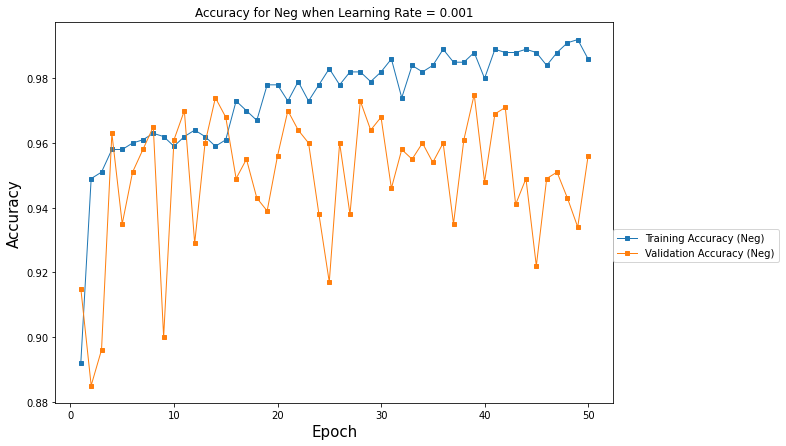

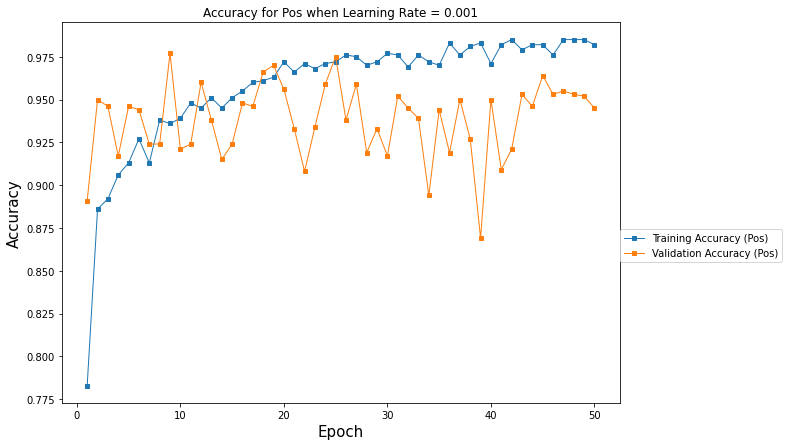

In [80]:
PlotLoss(loss_df,'0.001')
PlotACC_v2(loss_df,'0.001','Neg')
PlotACC_v2(loss_df,'0.001','Pos')

              precision    recall  f1-score   support

   Non-Golgy       0.99      0.97      0.98      6780
       Golgy       0.36      0.62      0.46       195

    accuracy                           0.96      6975
   macro avg       0.68      0.79      0.72      6975
weighted avg       0.97      0.96      0.96      6975



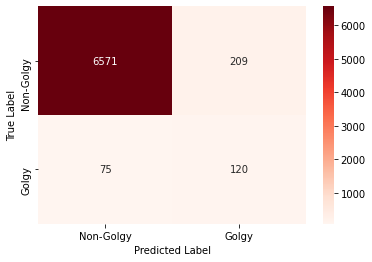

In [81]:
y_pred=Predict(model,torch.tensor(x_test))
PrintReport(y_test,y_pred)